# **Financial Database**
**Publicly Available Financial Data Sources:**

**Yahoo Finance API:** Provides stock market data, including historical prices, financial statements, etc.

In [5]:
!pip install yfinance

In [2]:
import yfinance as yf

# Fetch data for a specific stock, e.g., Apple Inc.
ticker = yf.Ticker("AAPL")

# Get historical market data
hist = ticker.history(period="5y")

print(hist.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-08-16 00:00:00-04:00  49.417581  50.114286  49.311140  49.954624   
2019-08-19 00:00:00-04:00  50.951288  51.461720  50.808562  50.885975   
2019-08-20 00:00:00-04:00  51.014188  51.611709  50.878719  50.888393   
2019-08-21 00:00:00-04:00  51.524623  51.684282  51.188367  51.439953   
2019-08-22 00:00:00-04:00  51.573014  51.875402  50.982750  51.396420   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-08-16 00:00:00-04:00  110481600        0.0           0.0  
2019-08-19 00:00:00-04:00   97654400        0.0           0.0  
2019-08-20 00:00:00-04:00  107537200        0.0           0.0  
2019-08-21 00:00:00-04:00   86141600        0.0           0.0  
2019-08-22 00:00:00-04:00   89014800        0.0           0.0  


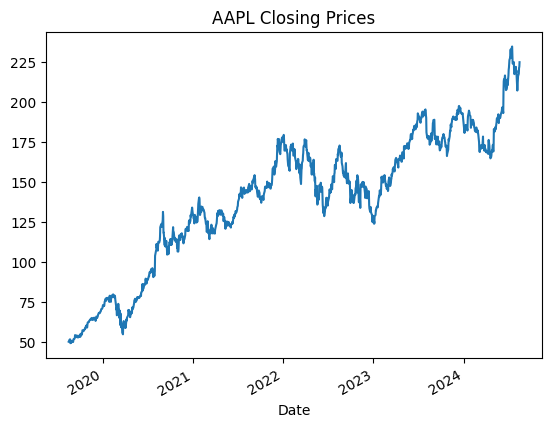

In [3]:
import matplotlib.pyplot as plt

# Plot the historical closing prices
hist['Close'].plot(title="AAPL Closing Prices")
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Save the file to your Google Drive
hist.to_csv('/content/drive/My Drive/AAPL_historical_data.csv')


Mounted at /content/drive


# **Storing data on Azure Blob Storage**


In [6]:
!pip install azure-storage-blob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.9/404.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00


In [11]:
from azure.storage.blob import BlobServiceClient

# Replace with your ACTUAL connection string, retrieved from your Azure Storage Account
connection_string = "your connection key"

# Create the BlobServiceClient object which will be used to interact with Azure Blob Storage
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

In [14]:
# Define the blob container and blob (file) name
container_name = "historical-data"
blob_name = "AAPL_historical_data.csv"

# Create a blob client using the file name
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Upload the file
with open('/content/drive/My Drive/AAPL_historical_data.csv', "rb") as data:
    blob_client.upload_blob(data)
